### 3F8 Inference: Coursework

#### Preparation Exercises

a) The derivation of the gradient of the log-likelihood of the parameters leads to:
    


$$\frac{\partial}{\partial\boldsymbol{\beta}}L(\boldsymbol{\beta}) = \sum^{N}_{n=1} \mathbf{x}^{(n)}(y^{(n)} - \sigma(\boldsymbol{\beta}^{T}\mathbf{x}^{(n)})$$

b) Pseudocode for gradient ascent:

In [1]:
def sigma(B, x):
    
    val = np.dot(B, x)
    
    return 1 / (1 + exp(-val))


def grad_ascent(B, x, y, rate):
    
    sig = sigma(B, x)
    
    grad = [(i-sig)*j for i, j in zip(x,y)]
    
    new_vals = [i + rate*j for i,j in zip(B, grad)]
    
    return new_vals

Learning rate must be decided so that a local minimum can be reached. This requires the learning rate to be small enough not to 'overshoot' the minimum. A larger learning rate reduces the time needed for convergence, however.

In some cases it can be be wise to reduce the learning rate as training progresses.

In [2]:
import numpy as np


# X is a 1000 x 2 array (1000 data points with 2 features)
X = np.loadtxt('X.txt')
# y is a 1000 length binary vector with class labels
y = np.loadtxt('y.txt')


In [3]:
import matplotlib.pyplot as plt


def plot_data_internal(X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    plt.figure(figsize=(10,10))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

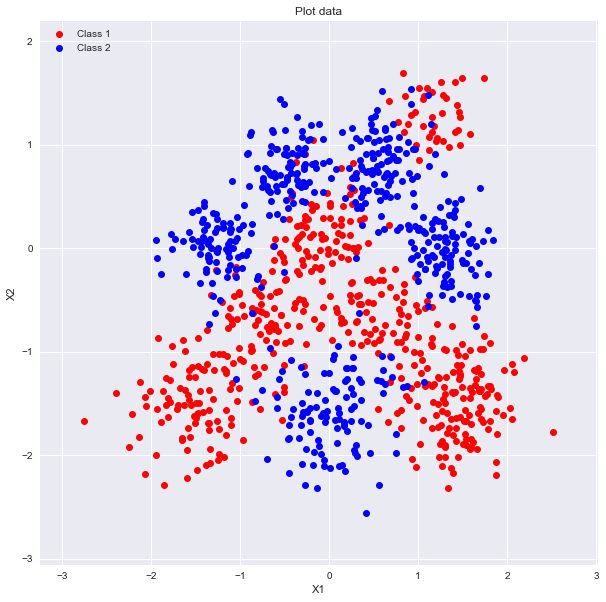

In [4]:
import seaborn as sns

sns.set()

plot_data(X, y)

A classifier with a linear class boundary will perform poorly on this dataset, since there is no single straight line which can suitably separate the two classes.

In [5]:
def prep_data(X,y, split):
    
    #for reproducibility, set the seed
    #for a different random shuffle, comment line below
    #np.random.seed(3)
    
    #np.random.shuffle(X)
    #np.random.shuffle(y)
    
    assert len(X) == len(y)
    
    total = len(X)
    
    train_size = int(split*total)
    
    X_train = X[:train_size]
    X_test = X[train_size:]
    
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    return X_train, X_test, y_train, y_test

In [60]:
X_train, X_test, y_train, y_test = prep_data(X, y, 0.8)

assert len(X_train) == len(y_train)

80/20 is a fairly standard training/test split. Training set is large so that the amount of data to train on is not reduced by a large amount. The test set is still big enough for the results of the test to accurately represent the performance of the classifier on unseen data.



In [88]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))


def grad_ascent(B, X, y, rate):
    
    sigma = logistic(np.dot(B, X.T))
    
    grad_sum = np.dot(X.T, (y - sigma))
    
    grad = np.sum(grad_sum, 0)
    
    new_vals = B + rate*grad
         
    return new_vals


In [18]:


# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# w: current parameter values
#
def compute_average_ll(X, y, w):
    output_prob = logistic(np.dot(X, w))
    return -np.mean(y * np.log(output_prob)
                   + (1 - y) * np.log(1.0 - output_prob))

##
# ll: 1d array with the average likelihood per data point, for each training
# step. The dimension of this array should be equal to the number of training
# steps.
#

def plot_ll(ll, ll2):
    plt.figure(figsize=(15,8))
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    ax.plot(np.arange(1, len(ll2) + 1), ll2, 'b-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()

In [64]:
#X_train = np.array([-1]*100+[1]*100)
#y_train = X_train.copy()
#X_train = np.vstack((X_train,X_train))
#print(X_train)

X_trial = X_train.copy()
y_trial = y_train.copy()

X_trial[:400, :] = 1
X_trial[400:, :] = -1
y_trial[:400] = 1
y_trial[400:] = -1

B = np.array([1]*len(X_train[0]))

i=0

history = []
train_history = []

print(X_train.shape[1])

X_train = np.concatenate((np.ones((1, X_train.shape[1])), X_train), 0)
X_test = np.concatenate((np.ones((1, X_train.shape[1])), X_test), 0)

print(X_train)


while i < 100:
    B = grad_ascent(B, X_train, y_train, 0.001)
    
    history.append(compute_average_ll(X_test, y_test, B))
    train_history.append(compute_average_ll(X_train, y_train, B))
    i +=1

print(B)

plot_ll(history, train_history)
    

2
[[ 1.          1.        ]
 [-0.62294615 -0.57879556]
 [ 1.09961316  1.55006583]
 ...
 [-0.4148496   0.53235369]
 [-1.52918719  0.01552899]
 [-0.06155454 -2.10221039]]


ValueError: operands could not be broadcast together with shapes (800,) (801,) 

In [57]:
##
# X: 2d array with input features at which to compute predictions.
#
# (uses parameter vector w which is defined outside the function's scope)
#

def predict_for_plot(x):
    x_tilde = np.concatenate((x, np.ones((0, x.shape[1]))), 0)
    return logistic(np.dot(x_tilde, B))

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# predict: function that recives as input a feature matrix and returns a 1d
#          vector with the probability of class 1.

def plot_predictive_distribution(X, y, predict):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)),
                                yy.ravel().reshape((-1, 1))), 1)
    Z = predict(X_predict)
    Z_out = predict(X)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, 20, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.2f', colors = 'k', fontsize = 14)
    plt.show()
    
    return Z_out

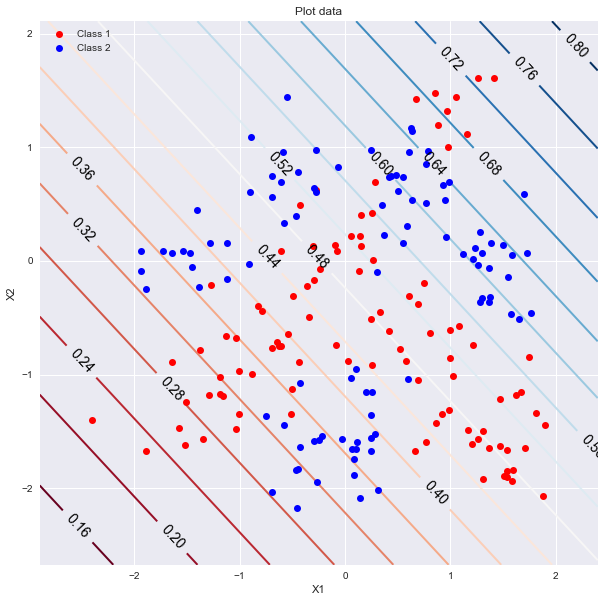

In [58]:
Z_out = plot_predictive_distribution(X_test, y_test, predict_for_plot)

In [22]:
!pip install sklearn

from sklearn.metrics import confusion_matrix

y_hat = np.around(Z_out)

confusion_matrix(y_test, y_hat)


You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


array([[64, 37],
       [47, 52]])

f)

In [70]:
def expand_inputs(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[0])
    ones_X = np.ones(X.shape[0])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [92]:
l = 0.1

X_train, X_test, y_train, y_test = prep_data(X, y, 0.5)

X_train_exp = expand_inputs(l, X_train, X_train)
X_test_exp = expand_inputs(l, X_test, X_test)
X_train_exp = np.concatenate((np.ones((X_train_exp.shape[0], 1 )), X_train_exp), 1)
X_test_exp = np.concatenate((np.ones((X_test_exp.shape[0], 1 )), X_test_exp), 1)

print(X_train_exp)

new_test_his = []
new_train_his = []

w = np.array([1]*501)

print(w.shape)

k=0

while k < 100:
    w = grad_ascent(w, X_train_exp, y_train, 0.0001)
    new_test_his.append(compute_average_ll(X_test_exp, y_test, w))
    new_train_his.append(compute_average_ll(X_train_exp, y_train, w))
    k += 1


[[1.00000000e+000 1.00000000e+000 1.43089464e-163 ... 6.12720004e-062
  9.32210454e-097 3.46296389e-092]
 [1.00000000e+000 1.43089464e-163 1.00000000e+000 ... 1.50891896e-182
  0.00000000e+000 7.02854937e-050]
 [1.00000000e+000 2.40790987e-084 2.57900786e-273 ... 5.64838192e-010
  3.23895227e-196 4.27639795e-098]
 ...
 [1.00000000e+000 6.12720004e-062 1.50891896e-182 ... 1.00000000e+000
  1.25574864e-219 1.49673693e-047]
 [1.00000000e+000 9.32210454e-097 0.00000000e+000 ... 1.25574864e-219
  1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 3.46296389e-092 7.02854937e-050 ... 1.49673693e-047
  0.00000000e+000 1.00000000e+000]]
(501,)


(501,)


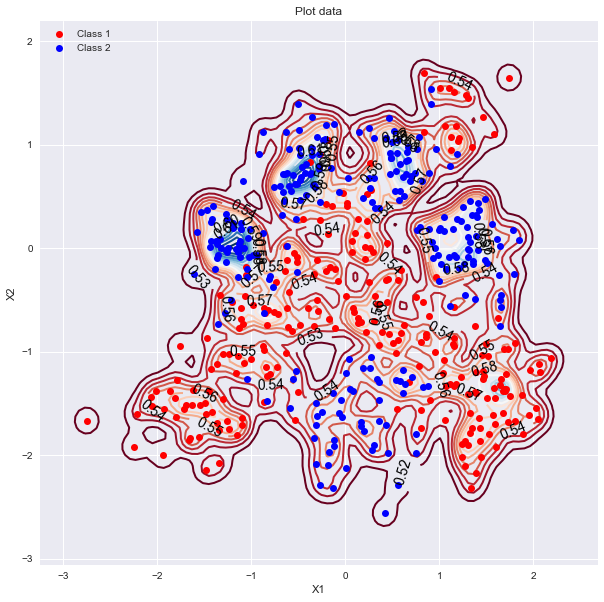

In [93]:
def predict_for_plot_expanded_features(x):
    x_expanded = expand_inputs(l, x, X_train)
    x_tilde = np.concatenate((np.ones((x_expanded.shape[0], 1 )), x_expanded), 1)
    return logistic(np.dot(x_tilde, w))

print(w.shape)

Z1_out = plot_predictive_distribution(X_train, y_train, predict_for_plot_expanded_features)

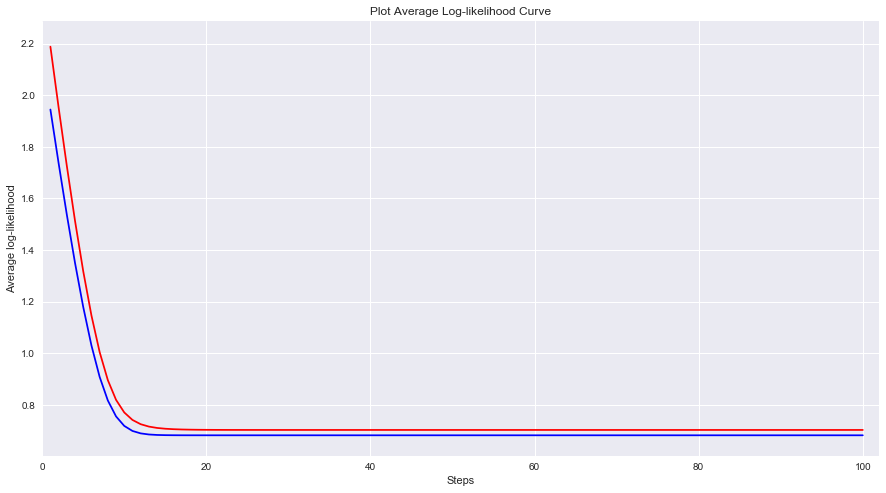

In [94]:
plot_ll(new_test_his, new_train_his)